In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

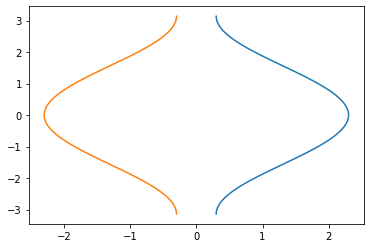

In [2]:
x=np.linspace(-3.14,3.14,100);
y=np.cos(x)+1.30;
plt.plot(y,x,-y,x);

In [12]:
ms=0.25;
ap=0.50;
def cyclo(B):
    kz = np.linspace(-np.pi, np.pi);
    Ez = np.cos(kz)+1.0+ms;

    dA = B;
    A = np.arange(0.5*dA, (2.0+ms)**2, dA);
    rk=np.sqrt(A);
    rk2 = np.array([np.flip(-rk),rk]);
    kz=np.arccos(abs(rk2)-(1.0+ms))*np.sign(rk2);
    rk3 = np.array([-rk2,rk2]);
    kz1= np.array([kz,kz]);
    dos=abs(rk2/np.abs(rk2)/(np.sin(kz)+0.01));
    
    x=np.linspace(-3.14,3.14,100);
    y=np.cos(x)+(1.0+ms);
    #plt.plot(y,x,-y,x);
    #plt.scatter(rk3,kz1)
    
    #plt.scatter(dos,kz)
    return(np.sum(dos))
    #plt.hist(kz,5)
    
def cyclop(B):
    kz = np.linspace(-np.pi, np.pi);
    Ez = np.cos(kz)+(1.0+ms);

    dA = B;
    lbd=(np.mod(ms**2,dA)+1.5)*dA
    
    A = np.arange(0.5*dA, (2.0+ms)**2, dA);
    rk=np.sqrt(A);
    rk2 = np.array([np.flip(-rk),rk]);
    kz=np.arccos(abs(rk2)-(1.0+ms))*np.sign(rk2);
    rk3 = np.array([-rk2,rk2]);
    kz1= np.array([kz,kz]);
    dos=abs(rk2/np.abs(rk2)/(np.sin(kz)+0.01));
    
    x=np.linspace(-3.14,3.14,100);
    y=np.cos(x)+(1.0+ms);
    plt.figure()
    plt.plot(y,x,-y,x);
    plt.scatter(rk3,kz1)
    plt.figure()
    plt.xlim(0,3.2)
    plt.scatter(kz,dos)
    #return(np.sum(dos))
    #plt.hist(kz,5)
    

In [13]:
interact(cyclop,B=(0.1,2))

interactive(children=(FloatSlider(value=1.05, description='B', max=2.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.cyclop(B)>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


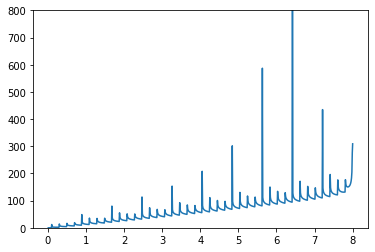

In [19]:
B1=np.arange(0.01,10,0.01)
Bs=1.0/B1
#Bs=np.arange(0.01,10.0,0.001);
dens=[];
for ii in Bs:
    dens.append(cyclo(ii));
plt.figure()
smeard=1.0/np.exp(dens)
#plt.xlim(0.0,2.0)
plt.ylim(0.0,800)
plt.plot(1.0/Bs,dens)